# Galaxy collisions

## Θεωρητικός υπολογισμός

Σε αυτό το notebook παρουσιάζονται οι υπολογισμοί πιθανότητας συγκρούσεων αστεριών κατά τις συγκρούσεις γαλαξιών. Οι υπολογισμοί βασίζονται στην αναλογία των ατόμων ενός αερίου με τα αστέρια ενός γαλαξία. Ο φορμαλισμός είναι απλός και αναλύεται παρακάτω.

Στην μελέτη αυτή, ένας γαλαξίας θεωρείται ώς ένας σχετικά λεπτός δίσκος που περιέχει αστέρες αριθμητικής πυκνότητας $n$ και ενεργούς διατομής $σ$. Έστω ένα σώμα που πληριάζει τον γαλαξία με ταχύτητα $υ$. Τότε, ο ρυθμός των συγκρούσεων είναι:
$$rate = σ \cdot υ \cdot n$$
, όπου $σ=π(2 \cdot R_{star})^2$, θεωρώντας ότι όλα τα αστέρια έχουν την ίδια ακτίνα, η οποία ακτίνα ισούται και με αυτή του εν κινήσει σώματος, και $n=N/V$, όπου $N$ ο αριθμός των αστέρων και $V$ ο όγκος του γαλαξία.

Θεωρώντας, επίσης, πως το φαινόμενο διαρκεί $t \sim 1 \space bil \space years$, τότε ο αριθμός των συγκρούσεων είναι:
$$collisions = rate \cdot t$$

Συνεπώς η πιθανότητα σύγκρουσης του σώματος με οποιοδήποτε αστέρι του γαλαξία θα ισούται με τον αριθμό των συγκρούσεων προς τον αριθμό όλων των πιθανών συγκρούσεων, δηλαδή τον αριθμό των αστέρων του γαλαξία: $p = \frac{collisions}{N}$, *ή*:
$$\boxed{p = \frac{σ \cdot (υ \cdot t) \cdot n}{N}}$$

Τέλος, εάν τα σώματα που κινούνται προς τον γαλαξία είναι αστέρια ενός άλλου γαλαξία, τότε χρησιμοποιώντας την διωνυμική κατανομή, μπορεί να υπολογιστεί η πιθανότητα σύγκρουσης *οποιουδήποτε αστεριού* του ενός γαλαξία με *οποιοδήποτε αστέρι* του άλλου. Αυτή η πιθανότητα θα δίνεται:
$$\boxed{P=\frac{m!}{k!(m-k)!}p^k(1-p)^{m-k}}$$
, όπου $m$ ο αριθμός των αστέρων του δεύτερου γαλαξία, $k=1$ η μοναδική ζητούμενη σύγκρουση και $p$ η πιθανότητα που υπολογίστηκε προηγουμένως.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.spatial.transform import Rotation as R
from scipy.stats.distributions import norm
import seaborn
import random

Εφαρμόζοντας τα παραπάνω για το παράδειγμα του δικού μας Γαλαξία και της Ανδρομέδας, θεωρώντας πως όλα τα αστέρια έχουν την ακτίνα του Ήλιου, προκύπτει:

In [2]:
ly = 3*10**5*365*24*3600   #km
R_A = 110*ly*10**3         #km
H_A = 2.6*ly*10**3         #km
R_s = 695510               #km
u = 110*3600               #km/h
t = 365*24*10**9           #h (Κανονικοποίηση σε 1 bil years)
N_A = 10**12

sigma = np.pi*(2*R_s)**2
Vol_A = H_A*np.pi*R_A**2

#Collisions per 1 bil years
collision_rate = sigma * (u*t) * (N_A/Vol_A)
print("Ο ρυθμός συγκρούσεων είναι:\n",collision_rate,
      "συγκρούσεις ανά 1 bil years.\n")

prob = collision_rate/N_A
print("Η πιθανότητα σύγκρουσης του Ήλιου "
      "με οποιονδήποτε αστέρα \nτης Ανδρομέδας είναι:",prob,".\n")

m = 400*10**9
tot_prob = m*prob*(1-prob)**(m-1)
print("Η πιθανότητα σύγκρουσης οποιουδήποτε αστέρα του Γαλαξία μας\n"
      "με οποιονδήποτε αστέρα της Ανδρομέδας είναι:",tot_prob,".")

Ο ρυθμός συγκρούσεων είναι:
 2.5195543868697897e-10 συγκρούσεις ανά 1 bil years.

Η πιθανότητα σύγκρουσης του Ήλιου με οποιονδήποτε αστέρα 
της Ανδρομέδας είναι: 2.5195543868697897e-22 .

Η πιθανότητα σύγκρουσης οποιουδήποτε αστέρα του Γαλαξία μας
με οποιονδήποτε αστέρα της Ανδρομέδας είναι: 1.0078217547479159e-10 .


Ο παραπάνω υπολογισμός απαιτεί πολλές απλουστεύσεις. Θα παρουσιάσουμε έναν πιο ρεαλιστικό υπολογισμό για την πιθανότητα σύγκρουσης του Ήλιου με οποιονδήποτε αστέρα της Ανδρομέδας.

## Υπολογιστική μέθοδος

Από τα παραπάνω βλέπουμε ότι ο αριθμός των συγκρούσεων μπορεί να γραφεί και ως:
$$collisions = \frac{σ \cdot N}{A}$$
όπου $A$ η συνολική επιφάνεια του στόχου. Συνεπώς, η πιθανότητα θα είναι:
$$p = \frac{collisions}{N}=\frac{σ}{Α}$$
Το μέγεθος $p$ δείχνει την πιθανότητα να γίνει μία σύγκρουση αστέρων κατά την διάρκεια μίας σύγκρουσης γαλαξιών. Επομένως, μπορεί να κατασκευαστεί μία κλάση ισοδυναμίας $m$ γαλαξιών όμοιας αριθμητικής πυκνότητας αστέρων $n$ με όμοιες ενεργές διατομές $σ$ αλλά τυχαία κατανομή. Τότε, "ρίχνοντας" ένα σώμα μέσα σε κάθε ένα απο αυτούς τους γαλαξίες θα υπάρχει πιθανότητα το σώμα να βρεθεί εντός ενεργούς διατομής κάποιου αστέρα (δηλαδή θα συγκρουστεί). Ο λόγος των συγκρούσεων προς τον αριθμό όλων των γαλαξιών $m$, για αρκετά μεγάλο $m$, θα συγκλίνει στην πιθανότητα $p$.

Έχοντας πει τα παραπάνω, μπορούμε να εφαρμόσουμε την μέθοδο σε ένα απλό παράδειγμα. Ο στόχος θα είναι ένας κύβος μοναδιαίας ακμής, με $Ν=100$ αστέρες, ενεργούς διατομής $σ=π \cdot 10^{-2}$, και συνεπώς η πιθανότητα σύγκρουσης θα είναι:
$$p=π \%$$

In [3]:
def dist(y1,z1,y2,z2):
    return np.sqrt((y1-y2)**2+(z1-z2)**2)

In [4]:
def trial(N_f, m_f, radius_f, x_s_f, y_s_f, scale_f):
    flag_f=0
    for i in range(m_f):
        x_f = np.random.rand(N_f,1)
        y_f = np.random.rand(N_f,1)
        
        scale_f = scale_f**(1/3)
        
        for j in range(N_f):
            if dist(x_f[j,0]*scale_f, y_f[j,0]*scale_f, x_s_f*scale_f, y_s_f*scale_f) <= radius_f:
                flag_f+=1
    return flag_f

In [5]:
N = 100
x_s = np.random.rand()
y_s = np.random.rand()
suma = 0
m = 10000

sigma_radius = 1/10

suma=trial(N, m, sigma_radius, x_s, y_s, 1)

print("Έγιναν ",suma," συγκρούσεις σε ",m," δοκιμές.")
print("Η πιθανότητα σύγκρουσης είναι: ",suma/m/N*100,"%.")
print("Η απόκλιση από το π είναι: ", abs(suma/m/N*100-np.pi)/np.pi*100,"%.")

Έγιναν  31228  συγκρούσεις σε  10000  δοκιμές.
Η πιθανότητα σύγκρουσης είναι:  3.1228 %.
Η απόκλιση από το π είναι:  0.5981887425258516 %.


Πράγματι παρατηρώ ότι για $m=10000$ κύβους - στόχους, που περιέχουν $N=100$ αστέρες ο κάθε ένας η απόκλιση της υπολογιστικής πιθανότητας σύγκρουσης από την θεωρητική είναι της τάξης του 1%.

Μένει να επιβεβαιωθεί για διαφορετικά $Ν$ και ίδιες αριθμητικές πυκνότητες.

In [6]:
N = 10
x_s = np.random.rand()
y_s = np.random.rand()

suma = 0
m = 10000

sigma_radius = 1/10

suma+=trial(N, m, sigma_radius, x_s, y_s, N/100)

print("Έγιναν ",suma," συγκρούσεις σε ",m," δοκιμές.")
print("Η πιθανότητα σύγκρουσης είναι: ",suma/m/N*100,"%.")
print("Η απόκλιση από το π είναι: ", abs(suma/m/N*100-np.pi)/np.pi*100,"%.")

Έγιναν  3118  συγκρούσεις σε  10000  δοκιμές.
Η πιθανότητα σύγκρουσης είναι:  3.1180000000000003 %.
Η απόκλιση από το π είναι:  0.7509774878940543 %.


## Εφαρμογή μεθόδου στις συγκρούσεις

Έχοντας επιβεβαιώσει την μέθοδο, μπορούμε να την γενικεύσουμε ώστε να αξιοποιήσουμε τις νέες δυνατότητες που μας προσφέρει.

Πλέον δεν είναι απαραίτητο οι ενεργές διατομές των αστέρων να είναι ίδιες. Επιπλέον, οι κατανομές των αστέρων μπορούν να προσεγγίσουν τις πραγματικές. Συνεπώς μπορούμε να κατασκευάσουμε έναν γαλαξία που θα περιέχει αστέρες διαφόρων ακτίνων και οι οποίοι θα κατανέμονται με διαφορετικό τρόπο μέσα σε αυτόν. Το σημαντικότερο όμως είναι ότι κατά τους υπολογισμούς δεν χρειάζεται το $Ν$ να είναι ο αριθμός των αστέρων ενός γαλαξία, αλλά αρκεί η αριθμητική πυκνότητα $n$ να είναι η ίδια.

Θα παράγουμε τους δύο γαλαξίες για καλύτερη οπτικοποίηση, χρησιμοποιώντας την παρακάτω συνάρτηση. Ο τρόπος κατανομής των αστέρων βασίζεται στις σημειώσεις που αναφέρονται στην βιβλιογραφία.

In [7]:
#In km
def galaxy(N, radius, height, scale, theta, offset):
    
    #Sigma - radius of stars in km
    R_sun = 695510                 #In km
    M_sun = 1                      #In sollar masses
    r_star = np.zeros((N,1))
    m_star = np.zeros((N,1))
    ran = np.random.rand(N,1)
    for k in range(N):
        if ran[k] < 0.76:
            r_star[k,0] = 0.5*R_sun
            m_star[k,0] = 0.4*M_sun
            
        elif ran[k] < (0.7645 + 0.121):
            r_star[k,0] = 0.9*R_sun
            m_star[k,0] = 0.8*M_sun
            
        elif ran[k] < (0.7645 + 0.121 + 0.076):
            r_star[k,0] = 1.1*R_sun
            m_star[k,0] = 1.1*M_sun
            
        elif ran[k] < (0.7645 + 0.121 + 0.076 + 0.03):
            r_star[k,0] = 1.4*R_sun
            m_star[k,0] = 1.7*M_sun
            
        elif ran[k] < (0.7645 + 0.121 + 0.076 + 0.03 + 0.006):
            r_star[k,0] = 2*R_sun
            m_star[k,0] = 3.1*M_sun
            
        else:
            r_star[k,0] = 7*R_sun
            m_star[k,0] = 18*M_sun

    
    
    
    r = radius*np.random.rand(N,1)
    th = 2*np.pi*np.random.rand(N,1)
    
    
    #z = height*np.random.rand(N,1)-height/2
    z_n = np.random.rand(N,1)
    z = height/5*np.log(1/z_n)
    for k in range(N):
        z[k] = (-1)**random.randint(1, 2)*z[k]
    
    coord = np.zeros((N,3))


    for i in range(N):
        coord[i,0] = r[i,0]*np.cos(th[i,0])*scale**(1/3) + offset[0]*1e15
        coord[i,1] = r[i,0]*np.sin(th[i,0])*scale**(1/3) + offset[1]*1e15
        coord[i,2] = z[i,0]*scale**(1/3) + offset[2]*1e15

    rot_x = R.from_euler('x', theta[0], degrees=True)
    rot_y = R.from_euler('y', theta[1], degrees=True)
    rot_z = R.from_euler('z', theta[2], degrees=True)
    rot = rot_z * rot_y * rot_x


    for i in range(N):
        coord[i,:]=rot.apply(coord[i,:])
    
    return coord, r_star, m_star

Τα μεγέθη που θα χρειαστούν για την κατασκευή των δύο γαλαξιών είναι:

In [8]:
#Scale
S = 10**(-9)

"""Andromeda"""
N_A = 1000

#In km
radius_A = 110*ly*10**3
height_A = 2.6*ly*10**3

"""Milkyway"""
N_M = 400

#In km
radius_M = 55*ly*10**3
height_M = 2*ly*10**3

Κατασκευάζω τους δύο γαλαξίες και τους απεικονίζω σε ένα 3D plot.

In [35]:
coord_A, rad_A, mass_A = galaxy(N = 1000, radius = radius_A, height = height_A, scale = S, theta = [30, 25, 60], offset = [0,0.5,0.2])

In [36]:
coord_M, rad_M, mass_M = galaxy(N = 400, radius = radius_M, height = height_M, scale = S, theta = [19, 0, 27], offset = [0,0,0])

(-1000000000000000.0, 1000000000000000.0)

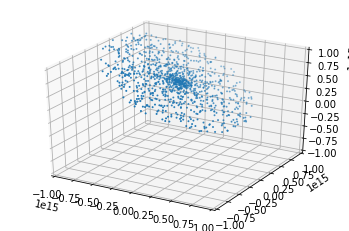

In [37]:
ax = plt.axes(projection='3d')
ax.scatter3D(coord_A[:,0], coord_A[:,1], coord_A[:,2], s=1)
ax.axes.set_xlim3d(left=-1e15, right=1e15)
ax.axes.set_ylim3d(bottom=-1e15, top=1e15)
ax.axes.set_zlim3d(bottom=-1e15, top=1e15)

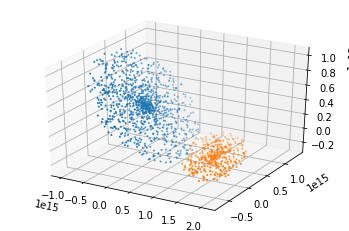

In [38]:
ax = plt.axes(projection='3d')
#ax.axes.set_xlim3d(left=-radius_A, right=2*radius_A)
#ax.axes.set_ylim3d(bottom=-radius_A, top=radius_A)
#ax.axes.set_zlim3d(bottom=-radius_A, top=radius_A)
ax.scatter3D(coord_A[:,0], coord_A[:,1], coord_A[:,2], s=1)
ax.scatter3D(coord_M[:,0]+(radius_M+radius_A)*S**(1/3), coord_M[:,1], coord_M[:,2], s=1)

Κατασκευάζω την συνάρτηση "collisions" η οποία δέχεται σαν μεταβλητές τις συντεταγμένες και τις ακτίνες των αστέρων κάθε γαλαξία. Στη συνέχεια ελέγχει εάν υπάρχουν αστέρες που να συγκρούονται.

In [39]:
"""Collisions"""
def collisions(coord_1, rad_1, coord_2, rad_2):
    
    N_1 = len(coord_1)
    N_2 = len(coord_2)
    
    counts = 0
    c_rad_1 = []
    c_rad_2 = []
    for i in range(N_1):
        for j in range(N_2):
                
            if dist(coord_1[i,1],coord_1[i,2],coord_2[j,1],coord_2[j,2]) < (rad_1[i,0] + rad_2[j,0]):
                counts+=1
                c_rad_1.append(rad_1[i,0])
                c_rad_2.append(rad_2[j,0])
    return(counts, c_rad_1, c_rad_2)

Κατασκευάζω κενές λίστες όπου θα αποθηκεύω τον αριθμό των συγκρούσεων, και τις ακτίνες των αστέρων οι οποίοι συμμετείχαν σε αυτές.

In [40]:
collision_num = []
rad_num_A = []
rad_num_M = []

Ορίζω πόσα simulation θέλω να γίνουν με την μεταβλητή "ammount".

In [49]:
ammount = 100

for m in range(ammount):
    coord_A, rad_A, mass_A = galaxy(N = 1000, radius = radius_A, height = height_A, 
                                    scale = S, theta = [90, 0, 90], offset = [0,0,0])
    
    coord_M, rad_M, mass_M = galaxy(N = 400, radius = radius_M, height = height_M,
                                    scale = S, theta = [90, 0, 90], offset = [0,0,0])

    counts_col, counts_rad_A, counts_rad_M = collisions(coord_A, rad_A, coord_M, rad_M)
    
    collision_num.append(counts_col)
    rad_num_A.extend(counts_rad_A)
    rad_num_M.extend(counts_rad_M)

Για 100 simulation το ιστόγραμμα των συγκρούσεων φαίνεται παρακάτω.

Text(0.5, 1.0, 'Collisions histogram (N = 100)')

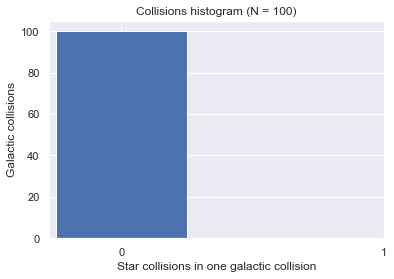

In [51]:
seaborn.set()
length_col = len(collision_num[100:])
bins = np.arange(0, max(collision_num[100:]) + 1.5) - 0.5
fig, ax = plt.subplots()
_ = ax.hist(collision_num[100:], bins, rwidth = 0.5)
ax.set_xticks(bins + 0.5)
ax.set(xlabel='Star collisions in one galactic collision', ylabel='Galactic collisions')
ax.set_title("Collisions histogram (N = "+str(length_col)+")")

Το πλήθος των αστέρων που συμμετείχαν στις συγκρούσεις ανά τύπο δίνονται στο παρακάτω γράφημα.

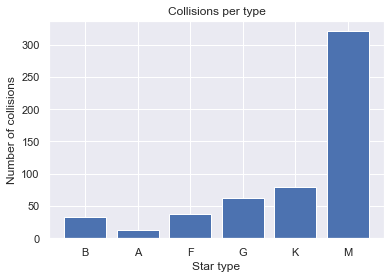

In [44]:
B_c = 0
A_c = 0
F_c = 0
G_c = 0
K_c = 0
M_c = 0

final_radius = np.concatenate((np.array(rad_num_A)/R_s, np.array(rad_num_M)/R_s))
for i in final_radius:
    if i == 0.5:
        M_c += 1
    elif i == 0.9:
        K_c += 1
    elif i == 1.1:
        G_c += 1
    elif i == 1.4:
        F_c += 1
    elif i == 2:
        A_c += 1
    elif i == 7:
        B_c +=1

diction = {
  "B": B_c,
  "A": A_c,
  "F": F_c,
  "G": G_c,
  "K": K_c,
  "M": M_c
}

names = list(diction.keys())
values = list(diction.values())

plt.bar(range(len(diction)), values, tick_label=names)
plt.xlabel('Star type')
plt.ylabel('Number of collisions')
plt.title('Collisions per type')
plt.show()

Επιστρέφοντας πίσω στον μαθηματικό φορμαλισμό, όπου είδαμε ότι:

$$ col \sim σ \cdot n \sim r^2 \cdot n $$

και υπολογίζοντας τους αριθμούς $r^2 \cdot n$ για τον κάθε τύπο αστέρων, προκύπτει:

In [46]:
aktines = np.array([7., 2., 1.4, 1.1, 0.9, 0.5])
times = np.array(values)
plithos = np.array([0.0013, 0.006, 0.03, 0.076, 0.121, 0.7645])

print(aktines)
print(plithos)
print(plithos*aktines**2)

[7.  2.  1.4 1.1 0.9 0.5]
[0.0013 0.006  0.03   0.076  0.121  0.7645]
[0.0637   0.024    0.0588   0.09196  0.09801  0.191125]


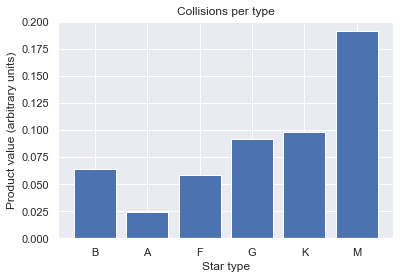

In [48]:
#plt.bar(range(len(diction)), values, tick_label=names)
plt.bar(names,plithos*aktines**2)
plt.xlabel('Star type')
plt.ylabel('Product value (arbitrary units)')
plt.title('Collisions per type')
plt.show()

$$ S \rightarrow V : 3D$$

$$ S^{1/3} \rightarrow l: 1D$$

$$ p \sim (υ \cdot t) \cdot n \sim \frac{l}{V} \sim S^{2/3} $$

$$ p \sim S^{2/3} \space\space\space\space \& \space\space\space\space p' \sim S'^{2/3} $$

$$ p = 10^{-12} \cdot p' $$

$$ col = 10^{-12} \cdot col' $$

Παρατηρώ μία σχετική ποιοτική ταύτιση, ωστόσο η υπολογιστική μέθοδος δίνει πιο αξιόπιστα αποτελέσματα, όπως εξηγήθηκε παραπάνω.

## Βιβλιογραφία

- Space Math, NASA: https://spacemath.gsfc.nasa.gov/weekly/5Page42.pdf
- Notes on HR diagram: https://people.highline.edu/iglozman/classes/astronotes/hr_diagram.htm
- Dr Rebecca Smethurst: https://www.youtube.com/c/DrBecky